In [2]:
!mkdir dataset
!mkdir dataset/images
!mkdir dataset/labels
!mkdir dataset/images/train
!mkdir dataset/images/val
!mkdir dataset/labels/train
!mkdir dataset/labels/val
!mkdir dataset/images/test
!mkdir dataset/labels/test

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/images’: File exists
mkdir: cannot create directory ‘dataset/labels’: File exists
mkdir: cannot create directory ‘dataset/images/train’: File exists
mkdir: cannot create directory ‘dataset/images/val’: File exists
mkdir: cannot create directory ‘dataset/labels/train’: File exists
mkdir: cannot create directory ‘dataset/labels/val’: File exists
mkdir: cannot create directory ‘dataset/images/test’: File exists
mkdir: cannot create directory ‘dataset/labels/test’: File exists


In [3]:
import os
images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
print(len(images))

14343


In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Используемое устройство: {device}")

Используемое устройство: cuda


In [4]:
import numpy as np
from tqdm import tqdm
import shutil
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt


def annotations(mask) :
    ans=[]
    #num_labels, labels = cv2.connectedComponents(mask.astype(np.uint8))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#  cv2.CHAIN_APPROX_NONE)
    #print(num_labels, labels)
    for contr in contours :
        contr=np.squeeze(contr, axis=1)

        class_id=mask[contr[0, 1], contr[0, 0]]
        ans.append([class_id, contr/512])
    return ans

images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
for i  in tqdm(range(len(images))) :
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
    CASE_IDENTIFIER=str(i).zfill(5)
    new_path='/kaggle/working/dataset/images/train/'+CASE_IDENTIFIER+'.png'
    shutil.copy(old_path, new_path)

    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    anns=annotations(img)
    new_path='/kaggle/working/dataset/labels/train/'+CASE_IDENTIFIER+'.txt'
    with open(new_path, "w", encoding="utf-8") as f:
        for ann in anns:
            if ann[0]==2 :
                contr=ann[1].flatten()
                if len(contr)<5 :
                    continue
                f.write(str(1)+' ')
                f.write(' '.join(map(str, contr)))
                f.write('\n')

100%|██████████| 14343/14343 [02:59<00:00, 80.03it/s]


In [5]:
for file in os.listdir('/kaggle/working/dataset/labels/train/') :
    with open('/kaggle/working/dataset/labels/train/'+file, "r") as f:
        content = f.read()
        if 1<len(content.split())<6 :
            print(file)
            print(content)


In [5]:



images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images')
for i  in tqdm(range(len(images))) :
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images/'+images[i]
    CASE_IDENTIFIER=str(i+14343).zfill(5)
    new_path='/kaggle/working/dataset/images/val/'+CASE_IDENTIFIER+'.png'
    shutil.copy(old_path, new_path)

    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)<3 :
        anns=annotations(img)
        new_path='/kaggle/working/dataset/labels/val/'+CASE_IDENTIFIER+'.txt'
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                if ann[0]==2 :
                    contr=ann[1].flatten()
                    if len(contr)<5 :
                        continue
                    f.write(str(1)+' ')
                    f.write(' '.join(map(str, contr)))
                    f.write('\n')

100%|██████████| 3391/3391 [00:45<00:00, 74.60it/s]


In [6]:

images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images')
for i  in tqdm(range(len(images))) :
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images/'+images[i]
    CASE_IDENTIFIER=str(i).zfill(5)
    new_path='/kaggle/working/dataset/images/test/'+CASE_IDENTIFIER+'.png'
    shutil.copy(old_path, new_path)

    
    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)<3 :
        anns=annotations(img)
        new_path='/kaggle/working/dataset/labels/test/'+CASE_IDENTIFIER+'.txt'
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                if ann[0]==2 :
                    contr=ann[1].flatten()
                    if len(contr)<5 :
                        continue
                    f.write(str(1)+' ')
                    f.write(' '.join(map(str, contr)))
                    f.write('\n')

100%|██████████| 3330/3330 [00:45<00:00, 72.41it/s]


In [7]:
import yaml

data = {
    'train': '/kaggle/working/dataset/images/train',
    'val': '/kaggle/working/dataset/images/val',
    'test': '/kaggle/working/dataset/images/test',
    'nc': 2,
    'names': ["background", "malignant"]
}

with open('config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [8]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [9]:
from ultralytics import YOLO

model = YOLO("yolo11m-seg.pt")  

model.train(data="config.yaml", epochs=30, imgsz=512, batch=8, lr0=0.00005, lrf=0.1, optimizer='AdamW')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 43.3M/43.3M [00:00<00:00, 190MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=5e-05, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2569.2±874.2 MB/s, size: 127.2 KB)


train: Scanning /kaggle/working/dataset/labels/train... 14343 images, 12761 backgrounds, 0 corrupt: 100%|██████████| 14343/14343 [00:07<00:00, 1934.04it/s]


train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 878.3±587.1 MB/s, size: 125.6 KB)


val: Scanning /kaggle/working/dataset/labels/val... 3185 images, 3042 backgrounds, 0 corrupt: 100%|██████████| 3391/3391 [00:01<00:00, 1918.43it/s]

val: New cache created: /kaggle/working/dataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: AdamW(lr=5e-05, momentum=0.937) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.33G      1.111      1.768      2.068     0.4637          1        512: 100%|██████████| 1793/1793 [07:23<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:43<00:00,  4.85it/s]


                   all       3391        362      0.321       0.16      0.107     0.0386       0.32      0.162      0.111     0.0494

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.98G      1.145      1.455      1.386     0.5712          1        512: 100%|██████████| 1793/1793 [07:13<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:42<00:00,  4.97it/s]


                   all       3391        362       0.57      0.354      0.358      0.173      0.562      0.351      0.355      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.98G      1.074      1.279      1.171     0.5539          0        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:43<00:00,  4.92it/s]


                   all       3391        362      0.433      0.356      0.311      0.138      0.393      0.304      0.242     0.0999

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.98G      1.095      1.282      1.125      0.573          1        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:43<00:00,  4.92it/s]

                   all       3391        362      0.514      0.331       0.33      0.171      0.467      0.334      0.306      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.98G      1.068      1.246      1.043     0.5655          1        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:42<00:00,  4.98it/s]

                   all       3391        362      0.505       0.42      0.373      0.186      0.491      0.425      0.373      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.98G      1.031      1.186       0.99     0.5528          0        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:42<00:00,  4.96it/s]


                   all       3391        362      0.503      0.412      0.355      0.179      0.502      0.409      0.349      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.98G      0.983       1.17      0.938     0.5315          0        512: 100%|██████████| 1793/1793 [07:07<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.13it/s]


                   all       3391        362      0.505      0.383       0.37      0.187      0.526      0.387      0.368      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.98G      1.027      1.208     0.9363     0.5555          0        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:42<00:00,  5.04it/s]


                   all       3391        362      0.421      0.395      0.331      0.162       0.43      0.403       0.33      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.98G      1.008      1.151     0.8705       0.56          0        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:42<00:00,  4.99it/s]


                   all       3391        362      0.476      0.378      0.353      0.181      0.451      0.367      0.331      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.98G     0.9754      1.138     0.8268     0.5511          0        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.07it/s]


                   all       3391        362      0.536      0.425      0.391      0.208      0.515      0.412      0.367      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.98G     0.9644      1.141     0.8305      0.535          1        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.08it/s]


                   all       3391        362        0.5      0.431      0.386      0.185      0.469      0.387      0.331      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.98G     0.9615      1.076     0.7861     0.5424          2        512: 100%|██████████| 1793/1793 [07:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.08it/s]


                   all       3391        362      0.481      0.448        0.4      0.207      0.457      0.428       0.36       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.98G     0.9584      1.091     0.8034     0.5486          0        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.06it/s]


                   all       3391        362      0.572      0.439      0.419      0.211      0.529      0.406      0.377      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.98G     0.9389       1.08     0.7343      0.542          2        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.16it/s]


                   all       3391        362       0.63       0.39      0.399      0.205      0.599      0.362      0.364      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.98G     0.9466      1.086     0.7411     0.5433          0        512: 100%|██████████| 1793/1793 [07:10<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.08it/s]

                   all       3391        362      0.522      0.465      0.411      0.219      0.488      0.431      0.377      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.98G     0.9243      1.053     0.7333     0.5307          2        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.06it/s]


                   all       3391        362      0.544      0.439       0.41       0.22      0.498      0.406      0.361      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.98G     0.9316      1.085     0.7289     0.5399          1        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.07it/s]


                   all       3391        362      0.526      0.434      0.402      0.206       0.51      0.395      0.361       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.98G     0.9279      1.041     0.7161     0.5374          0        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.12it/s]


                   all       3391        362      0.562      0.415      0.388      0.213      0.496      0.414      0.362      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.98G     0.9027      1.015     0.6642     0.5342          1        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.09it/s]


                   all       3391        362      0.591      0.401       0.38      0.201       0.55      0.373       0.34      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.98G     0.8934      1.044     0.6599     0.5472          2        512: 100%|██████████| 1793/1793 [07:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.13it/s]

                   all       3391        362      0.534      0.425      0.395      0.216      0.505      0.403      0.358      0.177


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.98G      0.814          1     0.5737     0.5107          1        512: 100%|██████████| 1793/1793 [07:07<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:41<00:00,  5.14it/s]


                   all       3391        362      0.504      0.425      0.375      0.219      0.465      0.392       0.33      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.98G     0.7825     0.9455     0.5337     0.4969          2        512: 100%|██████████| 1793/1793 [07:05<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.22it/s]


                   all       3391        362      0.551      0.407      0.378      0.211       0.51      0.376      0.336      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.98G     0.7392     0.8145     0.5245     0.4856          0        512: 100%|██████████| 1793/1793 [07:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.18it/s]

                   all       3391        362      0.568      0.367      0.364      0.205      0.523      0.337      0.321      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.98G     0.7663     0.8941      0.526     0.4942          0        512: 100%|██████████| 1793/1793 [07:05<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.17it/s]


                   all       3391        362      0.517      0.456        0.4       0.22      0.479      0.414      0.345      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.98G     0.7343     0.7974     0.4979     0.4829          0        512: 100%|██████████| 1793/1793 [07:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.20it/s]


                   all       3391        362      0.508      0.445      0.405      0.226      0.465      0.406       0.36      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.98G     0.7432     0.8202     0.4959     0.4881          1        512: 100%|██████████| 1793/1793 [07:05<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.19it/s]


                   all       3391        362      0.528      0.436      0.394      0.219      0.582      0.354      0.342      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.98G     0.7359      0.875     0.4917     0.4913          1        512: 100%|██████████| 1793/1793 [07:05<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.19it/s]

                   all       3391        362      0.505      0.448      0.396      0.222      0.482      0.428      0.359      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.98G      0.722      0.799     0.4683     0.4832          0        512: 100%|██████████| 1793/1793 [07:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.18it/s]


                   all       3391        362       0.59      0.423      0.403      0.227      0.563      0.403      0.373      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.98G     0.7268     0.8882     0.4655     0.4922          1        512: 100%|██████████| 1793/1793 [07:05<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.18it/s]


                   all       3391        362      0.618      0.401      0.405      0.229      0.595      0.378      0.375      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.98G     0.7012     0.7883     0.4575     0.4783          0        512: 100%|██████████| 1793/1793 [07:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:40<00:00,  5.19it/s]

                   all       3391        362      0.573      0.442      0.411      0.236      0.531      0.412      0.373      0.184



30 epochs completed in 3.924 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 45.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 45.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 212/212 [00:37<00:00,  5.58it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3391        362      0.574      0.439       0.41      0.237      0.534      0.414      0.376      0.184
             malignant        349        362      0.574      0.439       0.41      0.237      0.534      0.414      0.376      0.184
Speed: 0.2ms preprocess, 9.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d2da442910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

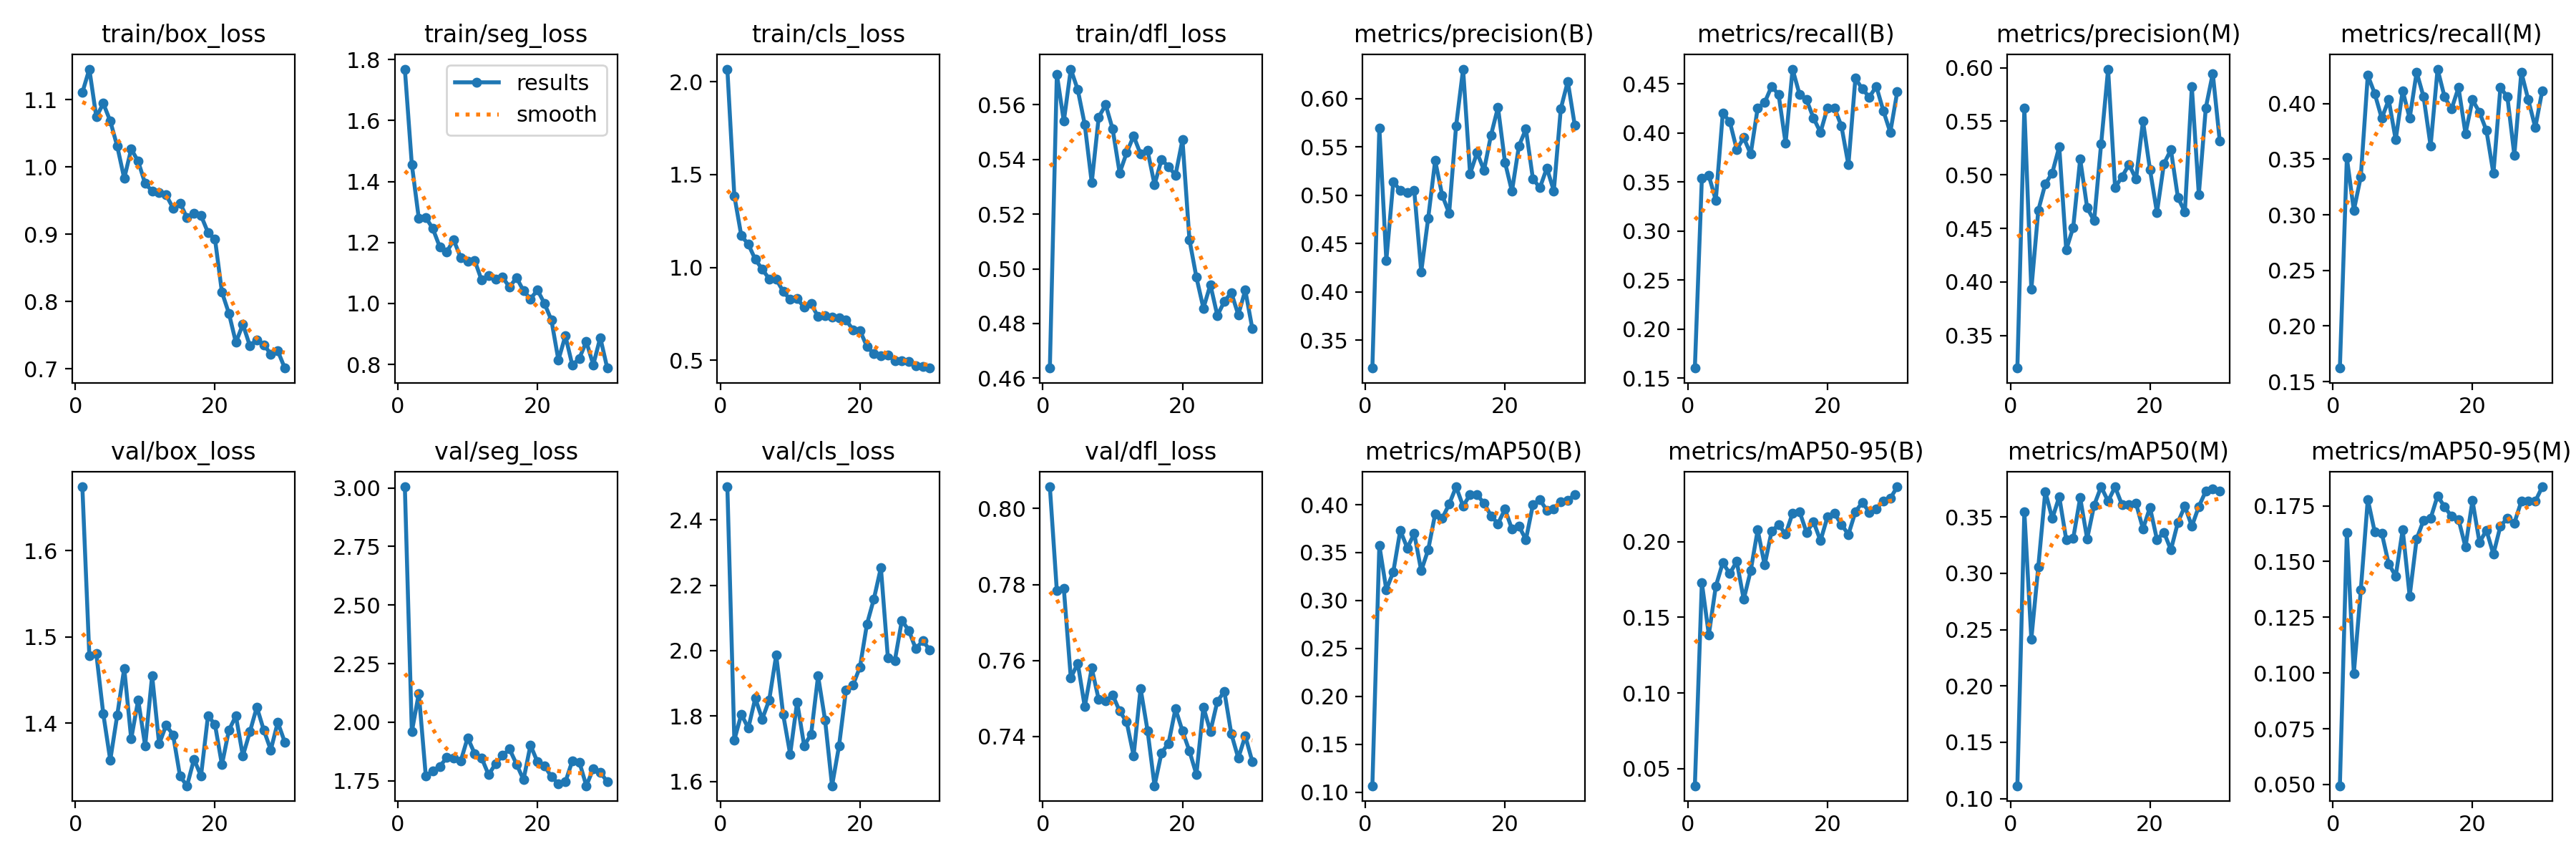

In [10]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/segment/train/results.png', width=1200)

In [ ]:
metrics = model.val()

In [11]:
metrics = model.val(data="/kaggle/working/config.yaml", split="test")

Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1001.3±618.2 MB/s, size: 103.6 KB)


val: Scanning /kaggle/working/dataset/labels/test... 3141 images, 3055 backgrounds, 0 corrupt: 100%|██████████| 3330/3330 [00:01<00:00, 1900.16it/s]

val: New cache created: /kaggle/working/dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 417/417 [01:30<00:00,  4.59it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3330        285      0.657      0.593      0.607      0.373      0.697      0.544       0.57      0.288
             malignant        275        285      0.657      0.593      0.607      0.373      0.697      0.544       0.57      0.288
Speed: 0.2ms preprocess, 25.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/segment/train2


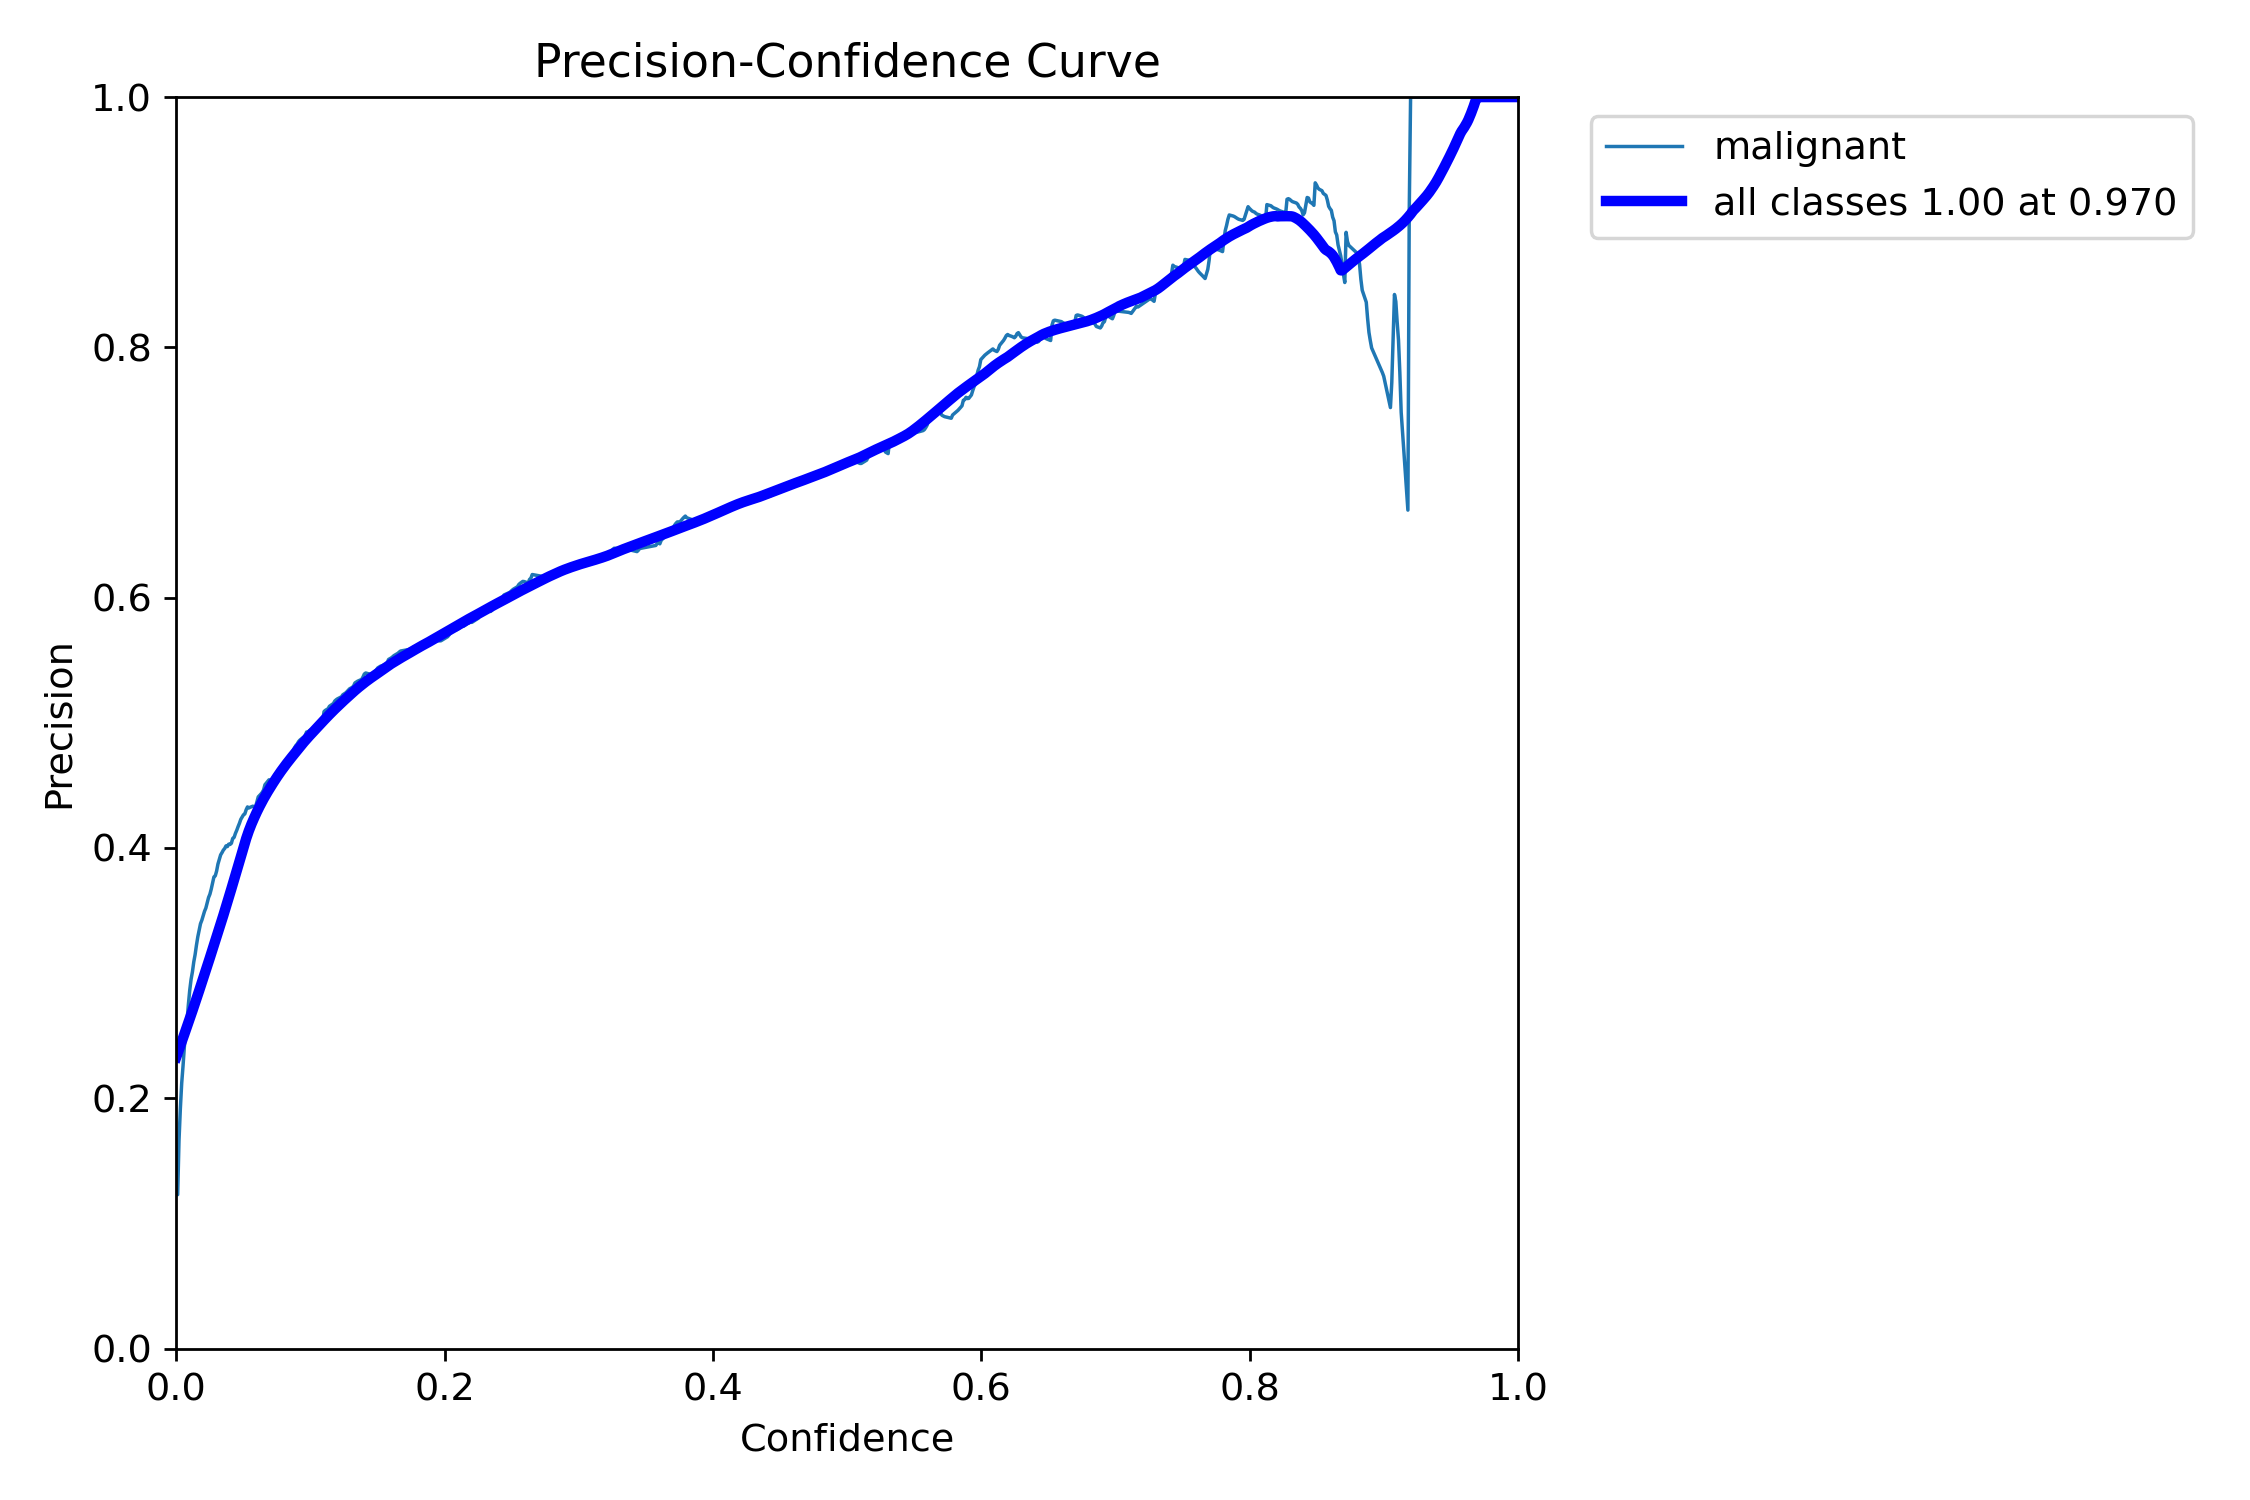

In [14]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/segment/train2/MaskP_curve.png', width=800)

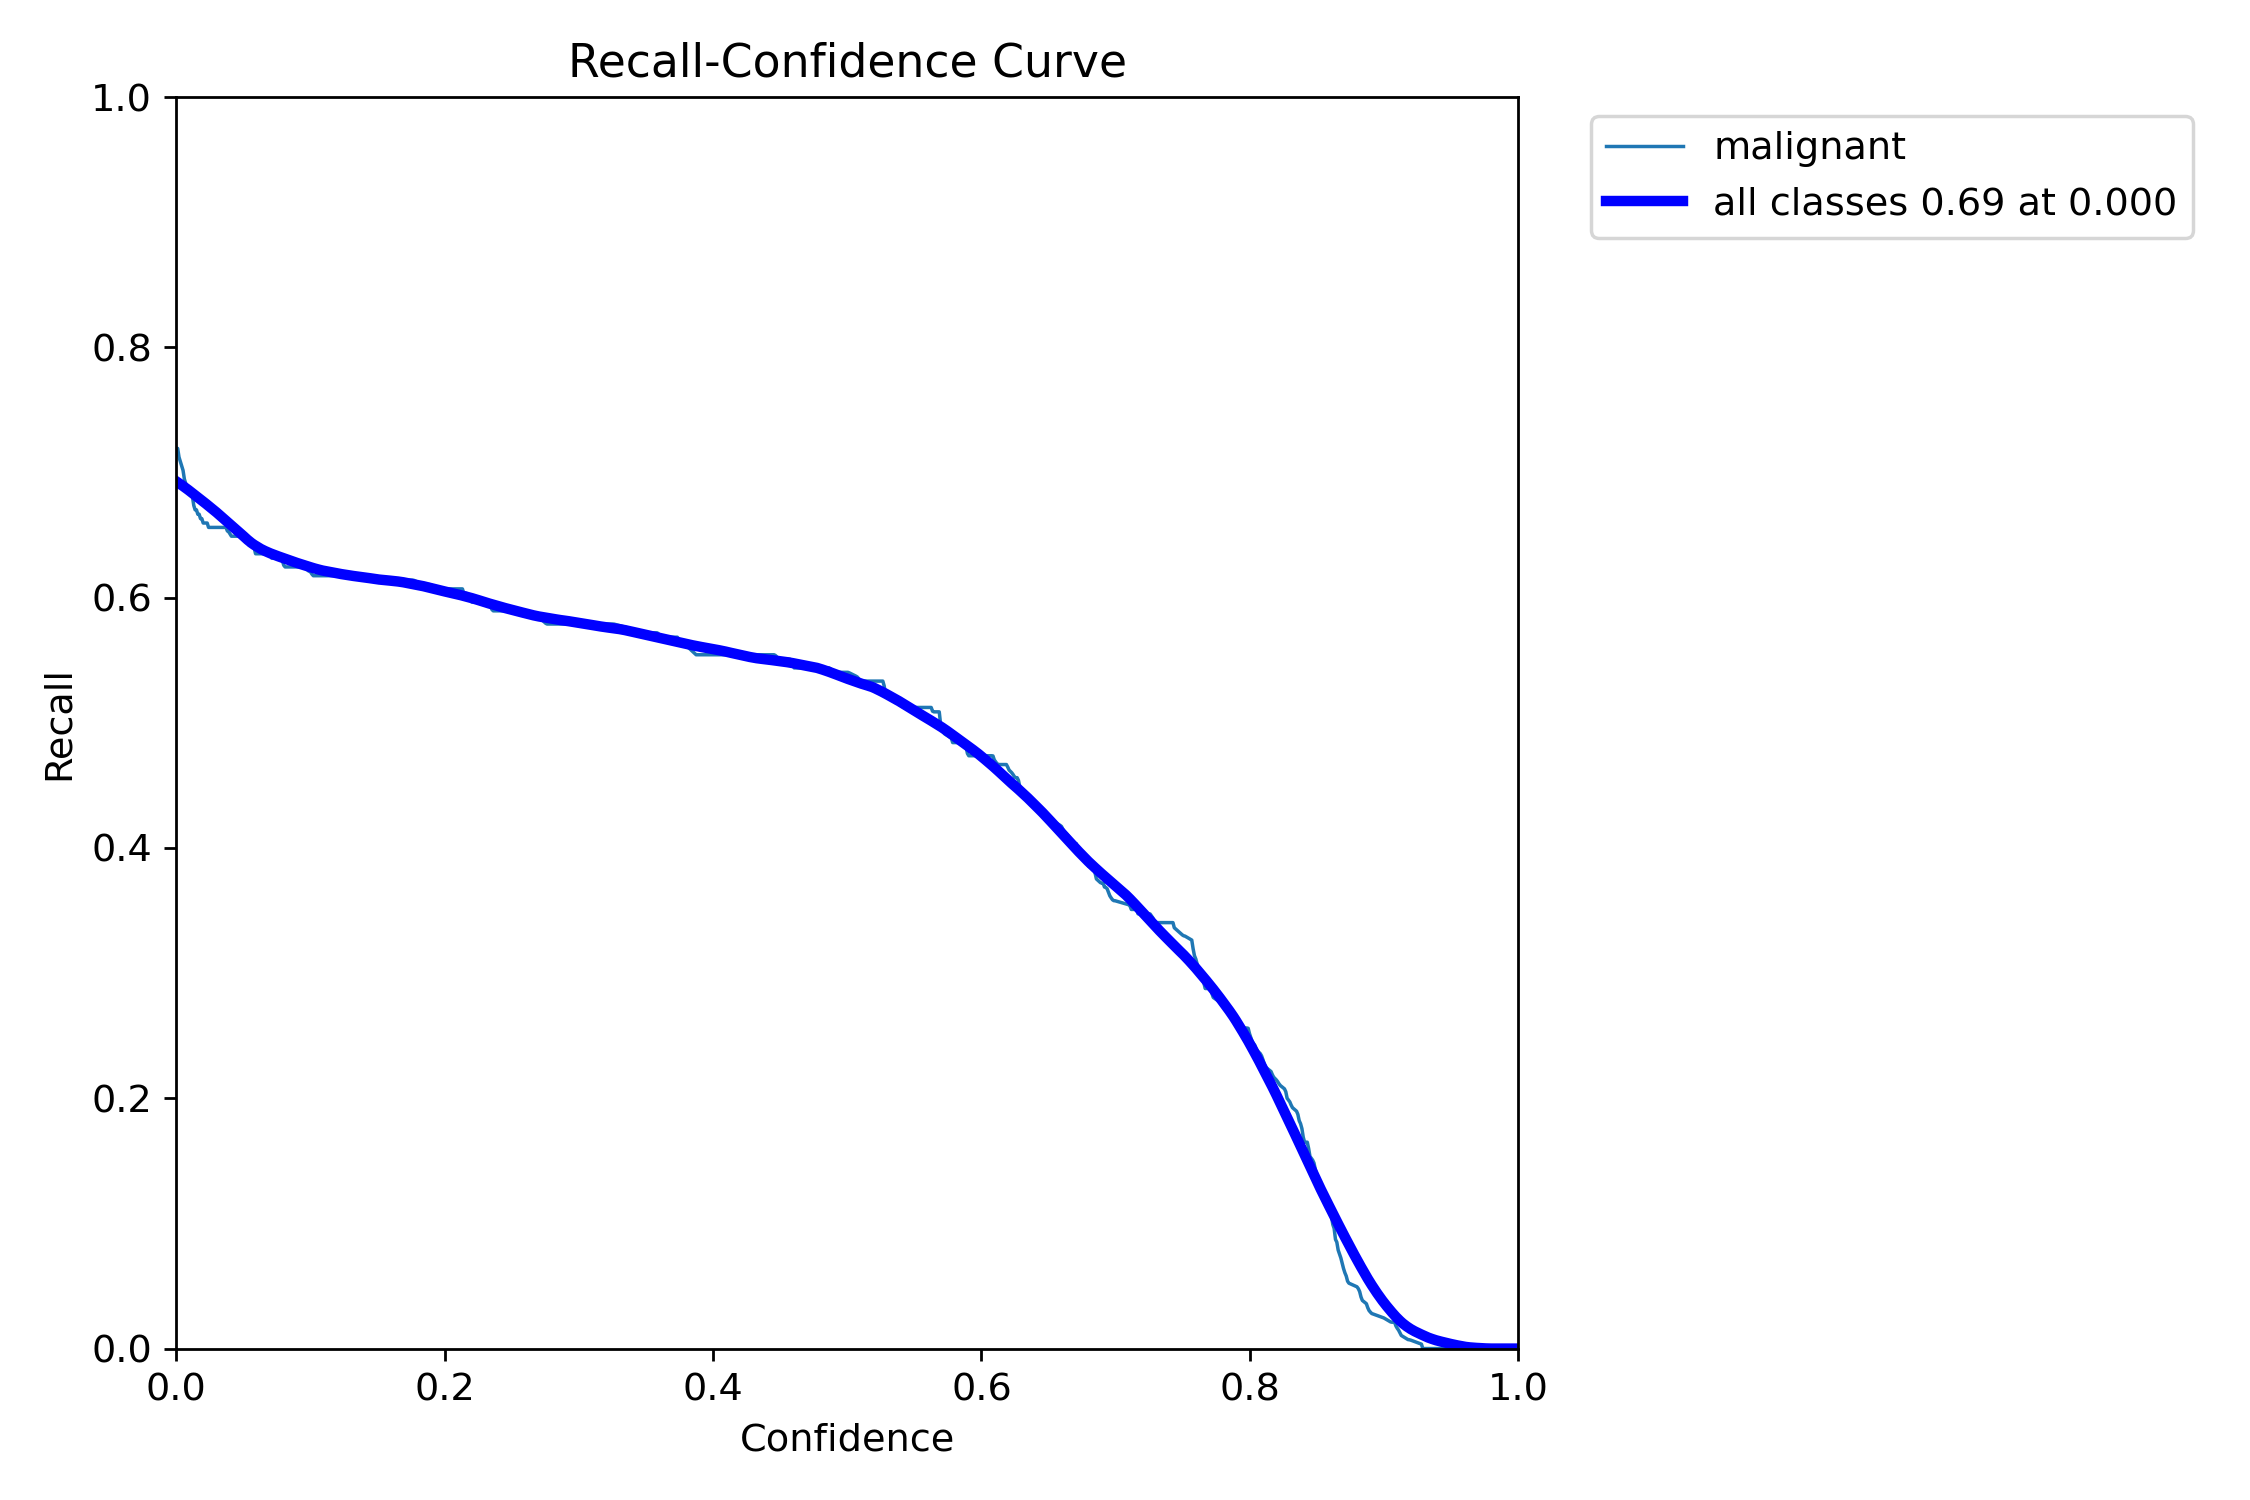

In [15]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/segment/train2/MaskR_curve.png', width=800)

In [19]:
metrics = model.val(data="/kaggle/working/config.yaml", split="test", conf=0.22)

Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 955.3±473.8 MB/s, size: 122.5 KB)


val: Scanning /kaggle/working/dataset/labels/test.cache... 3141 images, 3055 backgrounds, 0 corrupt: 100%|██████████| 3330/3330 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 417/417 [01:30<00:00,  4.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3330        285      0.657      0.593      0.652      0.428      0.697      0.544      0.624      0.345
             malignant        275        285      0.657      0.593      0.652      0.428      0.697      0.544      0.624      0.345
Speed: 0.2ms preprocess, 26.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/segment/train4


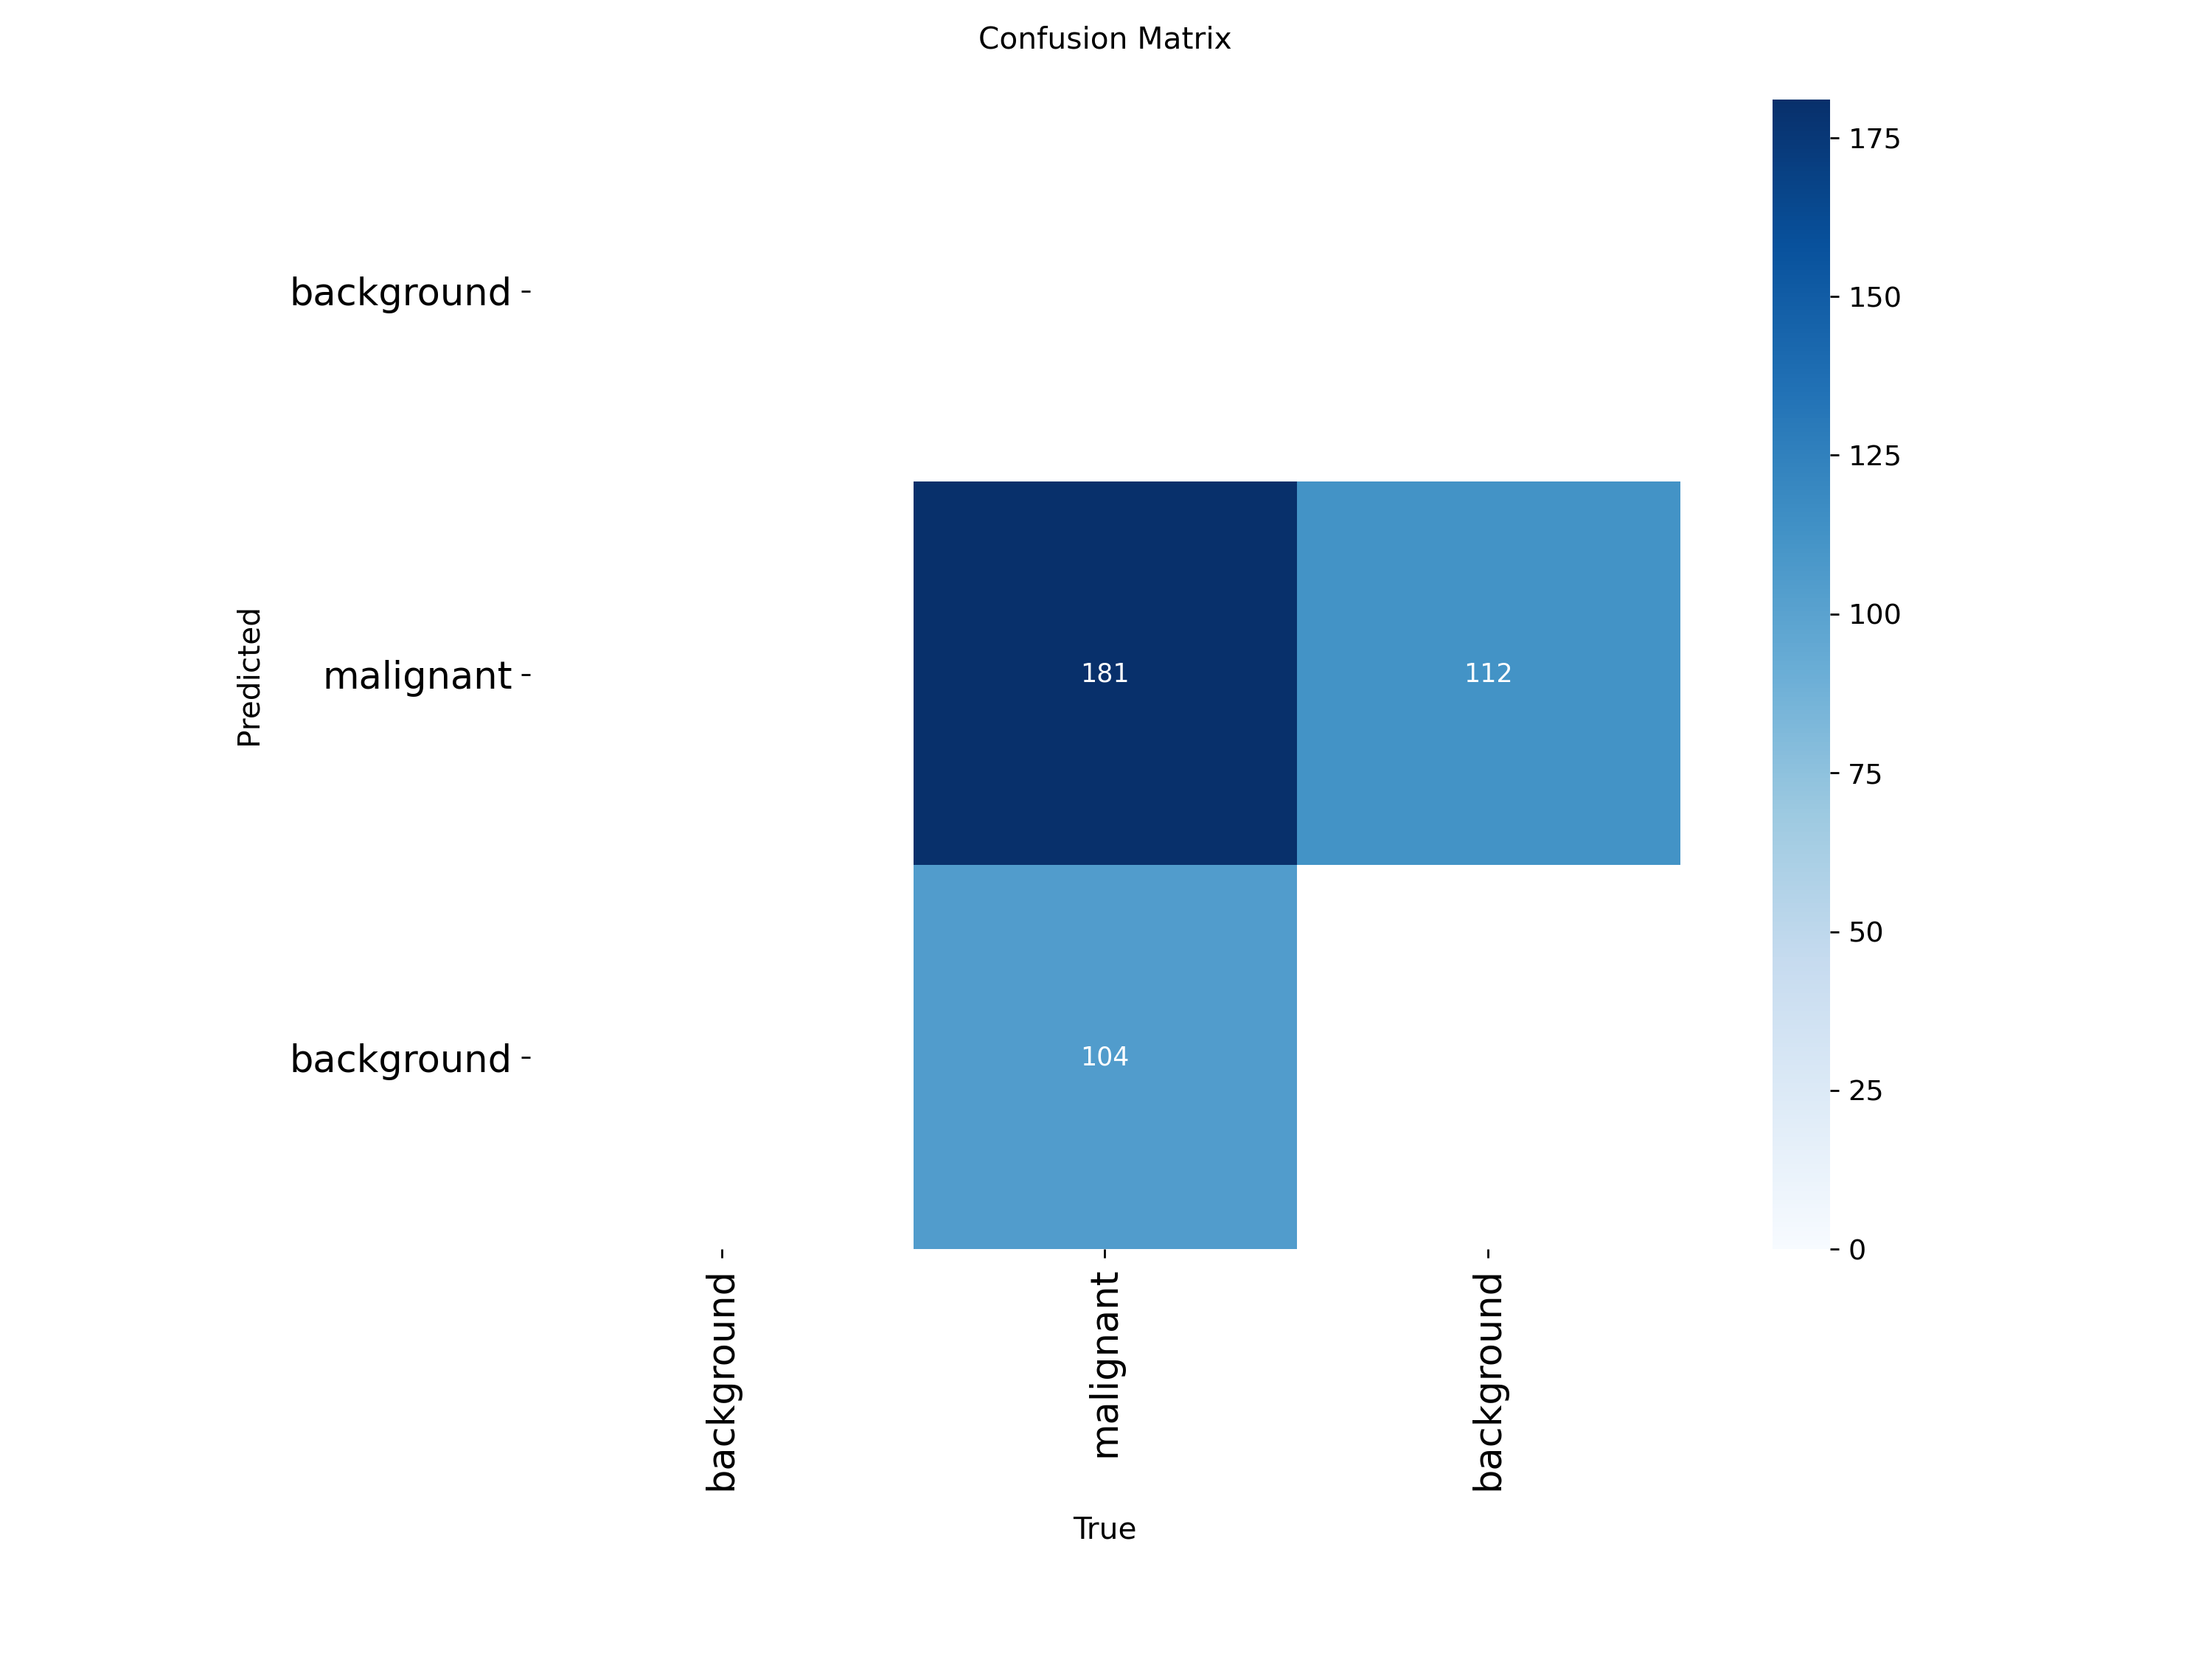

In [20]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/segment/train4/confusion_matrix.png', width=800)